In [118]:
import pandas as pd
df = pd.read_csv(r'C:\Users\mfornaroli\Desktop\datasets\diamonds.csv')
df.head()
#price of diamonds including some features that could be related

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


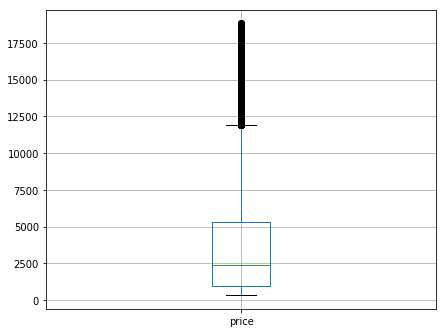

In [150]:
df.price.plot(kind='box', grid=True, figsize=(7,5.5), legend=True)
# df.price.plot(kind='hist', grid=True)
# df.price.plot(kind='line', grid=True)


In [131]:
# use index_col = 0 to set one of the column as index.. easy!
import numpy as np
df = pd.read_csv(r'C:\Users\mfornaroli\Desktop\datasets\diamonds.csv', index_col=0)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [132]:
# cut, color, clarity columns -> need to be converted to  numerical values!
print(df['cut'].unique())
print(df['color'].unique())
print(df['clarity'].unique())
# how to assign an arbitrary code to each cut ...?
# df['cut'].astype('category').cat.codes  # this works, but it's random

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [133]:
# we want to preserve the orger, however. since we want to do some regression.
# let's dictionary instead
cut_class_dict = {'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}
clarity_dict = {"I3": 1, "I2": 2, "I1": 3, "SI2": 4, "SI1": 5, "VS2": 6, "VS1": 7, "VVS2": 8, "VVS1": 9, "IF": 10, "FL": 11}
color_dict = {"J": 1,"I": 2,"H": 3,"G": 4,"F": 5,"E": 6,"D": 7}
# they provided us with them in kaggle! amazing

In [134]:
# definiamo le ordinate
cut_x = np.linspace(1,5,5)
clarity_x = np.linspace(1,11,11)
color_x = np.linspace(1,7,7)
# assign values to the dictionaries, default: linear
# cut_y = cut_x
# clarity_y = clarity_x
# color_y = color_x
def exponential_dict_function(n):
    i = 0
    for key in cut_class_dict:
        cut_class_dict[key] = cut_x[i]**n
        i += 1
    i = 0
    for key in clarity_dict:
        clarity_dict[key] = clarity_x[i]**n
        i += 1
    i = 0
    for key in color_dict:
        color_dict[key] = color_x[i]**n
        i += 1
exponential_dict_function(0.5)
# seems that this is the best coefficient

print(cut_class_dict)
print(clarity_dict)
print(color_dict)

{'Fair': 1.0, 'Good': 1.4142135623730951, 'Very Good': 1.7320508075688772, 'Premium': 2.0, 'Ideal': 2.23606797749979}
{'I3': 1.0, 'I2': 1.4142135623730951, 'I1': 1.7320508075688772, 'SI2': 2.0, 'SI1': 2.23606797749979, 'VS2': 2.449489742783178, 'VS1': 2.6457513110645907, 'VVS2': 2.8284271247461903, 'VVS1': 3.0, 'IF': 3.1622776601683795, 'FL': 3.3166247903554}
{'J': 1.0, 'I': 1.4142135623730951, 'H': 1.7320508075688772, 'G': 2.0, 'F': 2.23606797749979, 'E': 2.449489742783178, 'D': 2.6457513110645907}


In [135]:
df['cut'] = df['cut'].map(cut_class_dict)
df['clarity'] = df['clarity'].map(clarity_dict)
df['color'] = df['color'].map(color_dict)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,2.236068,2.449490,2.000000,61.5,55.0,326,3.95,3.98,2.43
2,0.21,2.000000,2.449490,2.236068,59.8,61.0,326,3.89,3.84,2.31
3,0.23,1.414214,2.449490,2.645751,56.9,65.0,327,4.05,4.07,2.31
4,0.29,2.000000,1.414214,2.449490,62.4,58.0,334,4.20,4.23,2.63
5,0.31,1.414214,1.000000,2.000000,63.3,58.0,335,4.34,4.35,2.75


In [141]:
import sklearn
from sklearn import svm
# always shuffle your data, man!
df = sklearn.utils.shuffle(df)
X = df.drop('price', axis = 1).values
y = df['price'].values 
print(X.shape)
print(y.shape)
# X

(53940, 9)
(53940,)


In [142]:
from sklearn import preprocessing
# scale your data: simplify it for your model. 
X = preprocessing.scale(X) # normalizes data
# X

In [139]:
test_size = 200
X_train = X[:-test_size]
y_train = y[:-test_size]
X_test = X[-test_size:]
y_test = y[-test_size:] 

clf = svm.SVR(kernel='linear')
%time clf.fit(X_train, y_train)

Wall time: 1min 32s


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [140]:
clf.score(X_test, y_test)
# score is going to be R^2 coeff of determination

0.664272213459508

In [115]:
for X,y in zip(X_test, y_test):
    print(f'predicted: {clf.predict([X])[0]} / Actual: {y}')
# f strings: instead of using format with {}, you just plugs variables inside the {}
# love it!

predicted: 912.0593259151119 / Actual: 816
predicted: 270.74109537501363 / Actual: 470
predicted: 3366.3256318862823 / Actual: 2858
predicted: 3075.6089466634967 / Actual: 2834
predicted: 763.8633935853632 / Actual: 932
predicted: 10922.361492203303 / Actual: 18014
predicted: 4228.5762989780105 / Actual: 4381
predicted: 5752.6596590880745 / Actual: 6632
predicted: 2950.8647553761225 / Actual: 2657
predicted: 2767.5243125254237 / Actual: 3084
predicted: 6851.9201714632545 / Actual: 6145
predicted: 1641.5921544076346 / Actual: 1922
predicted: 3497.8154514886724 / Actual: 2456
predicted: 1217.4215547993108 / Actual: 1143
predicted: 5936.627662986444 / Actual: 5316
predicted: 3127.783523250446 / Actual: 2450
predicted: 2644.4093937401726 / Actual: 2378
predicted: 573.1483276070571 / Actual: 738
predicted: 4613.460022720146 / Actual: 3018
predicted: 720.558410614914 / Actual: 1050
predicted: -380.1860275478898 / Actual: 589
predicted: 6317.984484437951 / Actual: 5889
predicted: 1575.5698621

# let s try another model now

In [59]:
clf = svm.SVR(kernel='rbf')
%time clf.fit(X_train, y_train)

Wall time: 1min 52s


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [61]:
clf.score(X_test, y_test)
for X,y in zip(X_test, y_test):
    print(f'predicted: {clf.predict([X])[0]} / Actual: {y}')
 # less accurate, but doesnt give us negative values at least


predicted: 4625.612404691428 / Actual: 5028
predicted: 867.5510568154473 / Actual: 567
predicted: 4436.721965704568 / Actual: 4398
predicted: 4621.937649436402 / Actual: 16198
predicted: 6809.654136670184 / Actual: 13393
predicted: 4863.466084669995 / Actual: 4704
predicted: 864.5561247066412 / Actual: 766
predicted: 5342.295150332764 / Actual: 6621
predicted: 714.4895503400585 / Actual: 497
predicted: 2731.0583075239824 / Actual: 2886
predicted: 1138.1109457012399 / Actual: 607
predicted: 931.3035031864442 / Actual: 926
predicted: 1219.2338715199871 / Actual: 765
predicted: 1668.8842604845863 / Actual: 2012
predicted: 3660.0129135288003 / Actual: 3616
predicted: 818.5497193708266 / Actual: 450
predicted: 5426.286440156995 / Actual: 9901
predicted: 1739.2240558195156 / Actual: 1814
predicted: 1057.2500850584115 / Actual: 926
predicted: 1367.2871208590639 / Actual: 1080
predicted: 4453.075418530344 / Actual: 4466
predicted: 1952.094764875274 / Actual: 1554
predicted: 3437.4342798045027 